In [2]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats
import seaborn as sns; sns.set_theme(color_codes=True)
import os
import matplotlib.pyplot as plt
import sklearn.cluster
import sklearn.metrics
import sklearn.datasets
import warnings
import scipy
from scipy.stats import f_oneway
warnings.filterwarnings("ignore")

In [3]:
import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42
sns.set_style(style='white')

In [20]:
common_TADs_meqtls = pd.read_csv("Carter Lab Datasets/common_TADs_meQTLs.csv")
common_TADs_meqtls

,Unnamed: 0,chr1,x1,x2,chr2,y1,y2,color,f1,f2,...,H3K27me3,H4K20me1,#meqtl,KMeans_State_Labels,#meqtl_pos,#meqtl_neg,domain_size,norm_meqtl_by_size,norm_pos_meqtl_by_size,norm_neg_meqtl_by_size
0,0,1,36960000,37910000,1,36960000,37910000,"255,255,0",1.8249,0.079690,...,0.167622,0.705304,206,4,71,141,950000,0.062006,0.021654,0.047834
1,1,1,38485000,39310000,1,38485000,39310000,"255,255,0",1.7513,0.051417,...,0.226065,0.369001,219,4,122,97,825000,0.075906,0.042846,0.037893
2,2,1,157140000,157480000,1,157140000,157480000,"255,255,0",1.3679,0.065425,...,0.275085,0.000000,283,4,90,194,340000,0.238009,0.076695,0.183891
3,3,1,64075000,64730000,1,64075000,64730000,"255,255,0",1.3300,0.074093,...,0.244738,0.000000,301,4,201,189,655000,0.131405,0.088911,0.092995
4,4,1,110325000,110530000,1,110325000,110530000,"255,255,0",1.5128,0.032783,...,0.499037,0.704529,38,0,26,22,205000,0.053005,0.036747,0.034587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.2678,0.032125,...,0.000000,0.000000,0,0,0,0,205000,0.000000,0.000000,0.000000
1096,1096,X,37785000,38035000,X,37785000,38035000,"255,255,0",1.5301,0.051187,...,1.000000,0.000000,0,1,0,0,250000,0.000000,0.000000,0.000000
1097,1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.0945,0.040047,...,0.000000,1.000000,0,1,0,0,235000,0.000000,0.000000,0.000000
1098,1098,X,102790000,102945000,X,102790000,102945000,"255,255,0",1.2129,0.041055,...,0.000000,0.000000,0,1,0,0,155000,0.000000,0.000000,0.000000


In [4]:
common_TADs_meqtls.to_csv("Carter Lab Datasets/common_TADs_meQTLs.csv")

In [5]:
allele_frequency = pd.read_csv("Carter Lab Datasets/allele_frequency/european.maf.frq", delim_whitespace=True)
allele_frequency

,CHR,SNP,A1,A2,MAF,NCHROBS
0,1,1:49298:C:T,T,C,0.04412,16434
1,1,1:54676:C:T,T,C,0.04734,16434
2,1,1:91536:G:T,T,G,0.12740,16434
3,1,1:534192:C:T,T,C,0.02026,16434
4,1,1:693731:A:G,G,A,0.13790,16434
...,...,...,...,...,...,...
7884713,23,X:155235483:T:C,C,T,0.12000,11547
7884714,23,X:155236723:A:G,G,A,0.09093,11569
7884715,23,X:155260480:T:A,A,T,0.24910,10783
7884716,23,X:155260480:T:G,G,T,0.22710,10906


In [6]:
allele_frequency["bp"] = allele_frequency["SNP"].str.split(":").str[1]
allele_frequency

,CHR,SNP,A1,A2,MAF,NCHROBS,bp
0,1,1:49298:C:T,T,C,0.04412,16434,49298
1,1,1:54676:C:T,T,C,0.04734,16434,54676
2,1,1:91536:G:T,T,G,0.12740,16434,91536
3,1,1:534192:C:T,T,C,0.02026,16434,534192
4,1,1:693731:A:G,G,A,0.13790,16434,693731
...,...,...,...,...,...,...,...
7884713,23,X:155235483:T:C,C,T,0.12000,11547,155235483
7884714,23,X:155236723:A:G,G,A,0.09093,11569,155236723
7884715,23,X:155260480:T:A,A,T,0.24910,10783,155260480
7884716,23,X:155260480:T:G,G,T,0.22710,10906,155260480


In [7]:
allele_frequency["chr"] = allele_frequency["SNP"].str.split(":").str[0]
allele_frequency

,CHR,SNP,A1,A2,MAF,NCHROBS,bp,chr
0,1,1:49298:C:T,T,C,0.04412,16434,49298,1
1,1,1:54676:C:T,T,C,0.04734,16434,54676,1
2,1,1:91536:G:T,T,G,0.12740,16434,91536,1
3,1,1:534192:C:T,T,C,0.02026,16434,534192,1
4,1,1:693731:A:G,G,A,0.13790,16434,693731,1
...,...,...,...,...,...,...,...,...
7884713,23,X:155235483:T:C,C,T,0.12000,11547,155235483,X
7884714,23,X:155236723:A:G,G,A,0.09093,11569,155236723,X
7884715,23,X:155260480:T:A,A,T,0.24910,10783,155260480,X
7884716,23,X:155260480:T:G,G,T,0.22710,10906,155260480,X


In [8]:
#allele_frequency["bp"] = pd.to_numeric(allele_frequency["bp"])
#del allele_frequency["SNP_pos"]
allele_frequency["snp_position"] = "chr" + allele_frequency["SNP"].str.split(":").str[0] + ":" + allele_frequency["SNP"].str.split(":").str[1]
allele_frequency

,CHR,SNP,A1,A2,MAF,NCHROBS,bp,chr,snp_position
0,1,1:49298:C:T,T,C,0.04412,16434,49298,1,chr1:49298
1,1,1:54676:C:T,T,C,0.04734,16434,54676,1,chr1:54676
2,1,1:91536:G:T,T,G,0.12740,16434,91536,1,chr1:91536
3,1,1:534192:C:T,T,C,0.02026,16434,534192,1,chr1:534192
4,1,1:693731:A:G,G,A,0.13790,16434,693731,1,chr1:693731
...,...,...,...,...,...,...,...,...,...
7884713,23,X:155235483:T:C,C,T,0.12000,11547,155235483,X,chrX:155235483
7884714,23,X:155236723:A:G,G,A,0.09093,11569,155236723,X,chrX:155236723
7884715,23,X:155260480:T:A,A,T,0.24910,10783,155260480,X,chrX:155260480
7884716,23,X:155260480:T:G,G,T,0.22710,10906,155260480,X,chrX:155260480


In [9]:
allele_frequency["bp"] = pd.to_numeric(allele_frequency["bp"])

In [10]:
TAD_label_maf = {0:[], 1:[], 2:[], 3:[], 4:[]}
for i, row in common_TADs_meqtls.iterrows():
    if i%100 == 0:
        print(i)
    common_chr = allele_frequency[allele_frequency["chr"] == row["chr1"]]
    snps = common_chr[(row["x1"] <= common_chr["bp"]) & (common_chr["bp"] <= row["x2"])]
    mean = np.mean(np.array(snps["MAF"]))
    num_snps = len(snps["SNP"])
    TAD_label_maf[row["KMeans_State_Labels"]].append(mean/num_snps)

0
100
200
300
400
500
600
700
800
900
1000


In [12]:
len(TAD_label_maf[0])

252

In [11]:
for key in TAD_label_maf:
    temp = []
    for lst in TAD_label_maf[key]:
        for el in lst:
            temp.append(el)
    TAD_label_maf[key] = temp
TAD_label_maf

TypeError: 'numpy.float64' object is not iterable

In [ ]:
TAD_label_maf

In [15]:
norm_TAD_label_maf = TAD_label_maf.copy()
for key in norm_TAD_label_maf:
#     norm = np.linalg.norm(norm_TAD_label_maf[key])
#     norm_ans = TAD_label_maf[key]/norm
#     norm_TAD_label_maf[key] = norm_ans
    norm_ans = np.array(norm_TAD_label_maf[key])/len(norm_TAD_label_maf[key])
    norm_TAD_label_maf[key] = norm_ans
norm_TAD_label_maf

{0: array([1.87250570e-06, 1.10936906e-07, 1.23349012e-06, ...,
        2.76510832e-07, 2.43550456e-07, 1.42828297e-07]),
 1: array([1.66239562e-07, 8.17022342e-07, 4.02067777e-07, ...,
        1.29493807e-06, 7.19450949e-08, 7.49642852e-07]),
 2: array([2.58359500e-06, 3.24464276e-07, 3.01217430e-06, ...,
        1.42125269e-07, 5.37211480e-06, 1.13259516e-07]),
 3: array([1.05103715e-05, 2.97260908e-06, 2.85479867e-06, ...,
        1.71582446e-05, 1.50376573e-05, 2.27332015e-06]),
 4: array([1.05665803e-07, 6.66006538e-08, 3.27667982e-07, ...,
        6.94039400e-07, 9.46335155e-08, 2.88331547e-07])}

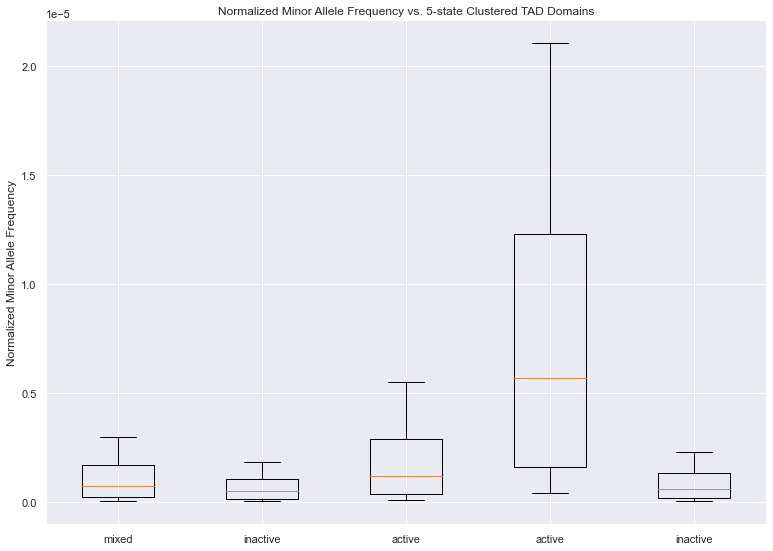

In [16]:
data = [norm_TAD_label_maf[0], norm_TAD_label_maf[1], norm_TAD_label_maf[2], norm_TAD_label_maf[3], norm_TAD_label_maf[4]]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
boxplt = ax.boxplot(data)
plt.ylabel("Normalized Minor Allele Frequency")
plt.title("Normalized Minor Allele Frequency vs. 5-state Clustered TAD Domains")
ax.set_xticklabels(['mixed', 'inactive','active', 'active', 'inactive'])
plt.show()

In [13]:
stats.kruskal(TAD_label_maf[0], TAD_label_maf[1], TAD_label_maf[2], TAD_label_maf[3], TAD_label_maf[4])

KruskalResult(statistic=60.42873825935567, pvalue=2.3573321249808416e-12)

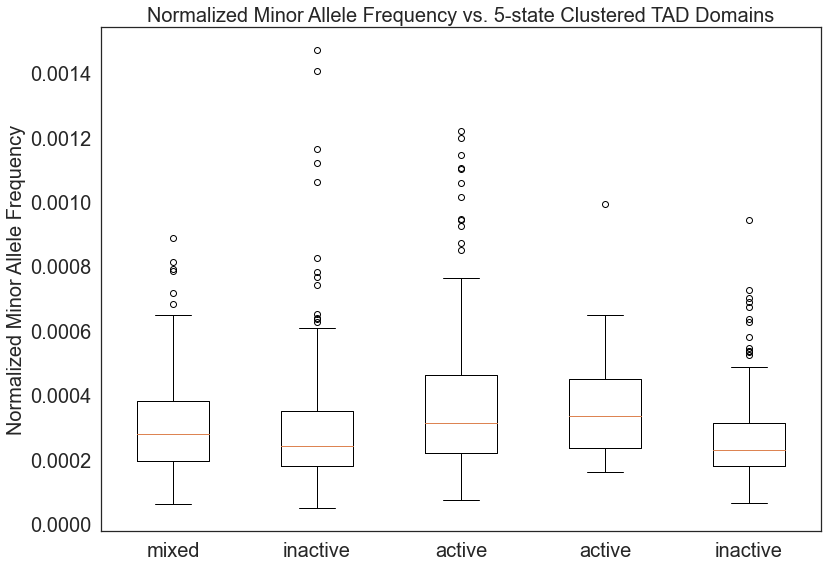

In [14]:
data2 = [TAD_label_maf[0], TAD_label_maf[1], TAD_label_maf[2], TAD_label_maf[3], TAD_label_maf[4]]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
boxplt = ax.boxplot(data2)
plt.ylabel("Normalized Minor Allele Frequency", fontsize=20)
plt.title("Normalized Minor Allele Frequency vs. 5-state Clustered TAD Domains", fontsize=20)
ax.set_xticklabels(['mixed', 'inactive','active', 'active', 'inactive'], fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [40]:
compiled_meqt_sig = pd.read_csv("Carter Lab Datasets/meQTL Data/all_cancers_meQTLs.csv")
compiled_meqt_sig.head()

,Unnamed: 0,cancer_type,snp,snp_position,alleles,probes,probe_position,probe_gene,beta,status,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,chr,bp
0,0,BLCA,rs11684598,chr2:33952621,G/A,cg04131969,chr2:33951647,MYADML,-1.24,-40.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33952621
1,1,BLCA,rs12232965,chr2:33954560,C/T,cg04131969,chr2:33951647,MYADML,-1.24,-39.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33954560
2,2,BLCA,rs7574695,chr2:33953186,C/T,cg04131969,chr2:33951647,MYADML,-1.24,-39.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33953186
3,3,BLCA,rs11777332,chr8:91676709,G/A,cg16814680,chr8:91681699,NaN,-1.20,-36.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr8,91676709
4,4,BLCA,rs4332092,chr8:91677926,G/A,cg16814680,chr8:91681699,NaN,-1.20,-36.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr8,91677926


In [44]:
common_snps_meqtls = pd.merge(allele_frequency, compiled_meqt_sig, on="snp_position")
print(len(common_snps_meqtls["snp"]))

9599405
